IMPORT THE NESSECARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

UNDERSTANDING OUR DATASET

In [4]:
df = pd.read_csv("/content/ml_dataset.csv")

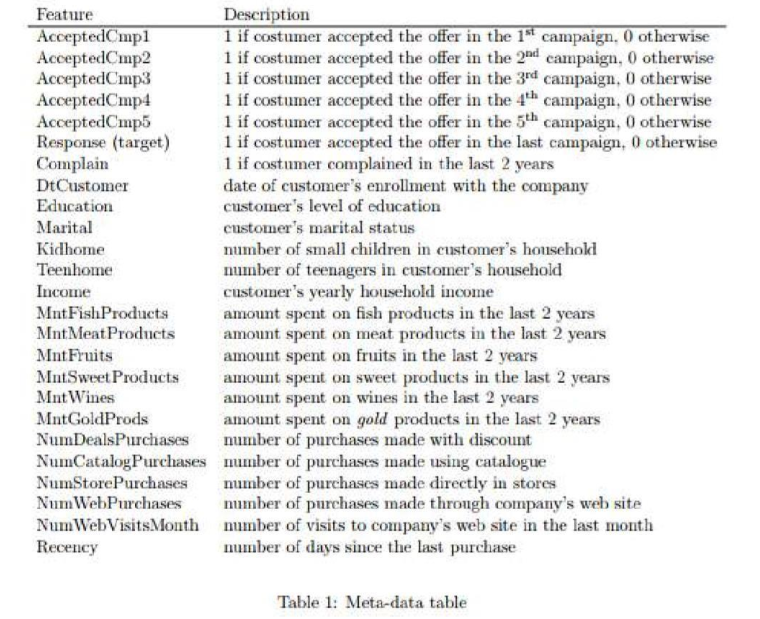

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [6]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [8]:
# club all the marital status into one where value = 1 if single and 2 if married
df['marital_Status'] = None
df['marital_Status'] = np.where((df['marital_Together'] == 1) | (df['marital_Married'] == 1), 2, 1)

In [9]:
df['marital_Status'].head(20)

0     1
1     1
2     2
3     2
4     2
5     2
6     1
7     2
8     2
9     2
10    2
11    1
12    1
13    2
14    1
15    2
16    2
17    2
18    1
19    2
Name: marital_Status, dtype: int64

In [10]:
#remove the unwanted colums
drop_columns = ['marital_Divorced',
                'marital_Married',
                'marital_Single',
                'marital_Together',
                'marital_Widow']
df = df.drop(columns=drop_columns)


In [11]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,2512.718367,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,1.644898
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,202.563647,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.478653
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,1.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,1.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,2515.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,2.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,2688.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,2.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,2.000000


In [12]:
df.isna().sum().sum()

0

DATA VISUALIZATION

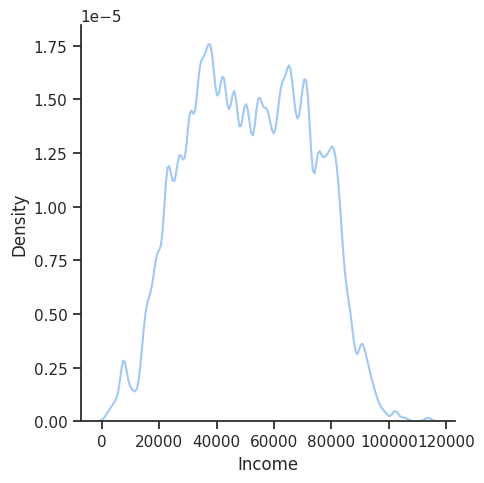

In [13]:
df_histogram = df['Income']
sns.set_theme(style="ticks", palette="pastel")
sns.displot(df_histogram, kind="kde", bw_adjust=.25, height=5);

In [14]:
def histogram_numerical(data):
    variables_spent_food= [data]
    df_spent_histogram=df[variables_spent_food]
    sns.displot(df_spent_histogram, kind="kde", bw_adjust=.25, height=2)

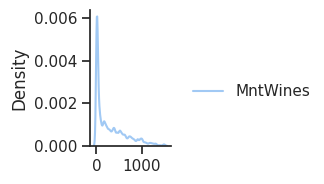

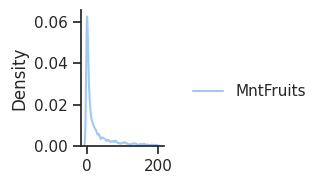

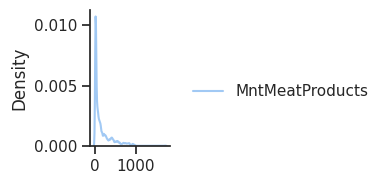

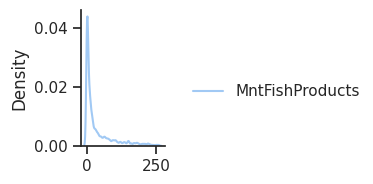

In [15]:
variables_spent_food= ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts' ]
variable_spent_gold=['MntGoldProds']

for i in variables_spent_food:histogram_numerical(i)

In [16]:
sns.set_theme(style="ticks", palette="pastel")

variables_numerical= ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntGoldProds', 'Customer_Days' ,'Age' ,'Recency' ]
df_variables_numerical = df[variables_numerical]
sns.pairplot(data=df_variables_numerical)

Output hidden; open in https://colab.research.google.com to view.

PREPROCESSING THE DATA TO REMOVE THE OUTLIERS

In [17]:
df_eval = df.copy()

In [18]:
df_eval['Total_Acceptance'] = df_eval[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [19]:
df_eval.loc[df_eval.Total_Acceptance >= 1]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,Total_Acceptance
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,1,1
8,30351,1,0,19,14,0,24,3,3,2,...,0,0,0,0,1,44,42,0,2,1
9,5648,1,1,68,28,0,6,1,1,13,...,0,0,0,0,1,36,23,1,2,1
14,82800,0,0,23,1006,22,115,59,68,45,...,0,0,0,0,1,1270,1225,2,1,3
17,76995,0,1,91,1012,80,498,0,16,176,...,0,0,0,1,0,1606,1430,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,57642,0,1,24,580,6,58,8,0,27,...,0,0,0,0,1,652,625,1,1,1
2196,11012,1,0,82,24,3,26,7,1,23,...,0,0,1,0,0,61,38,1,1,1
2201,64014,2,1,56,406,0,30,0,0,8,...,0,0,0,0,1,436,428,1,2,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1217,1193,1,1,1


In [20]:
df_eval["Total_Bool"] = np.where(df_eval['Total_Acceptance'] >= 1, "Good", "Bad")

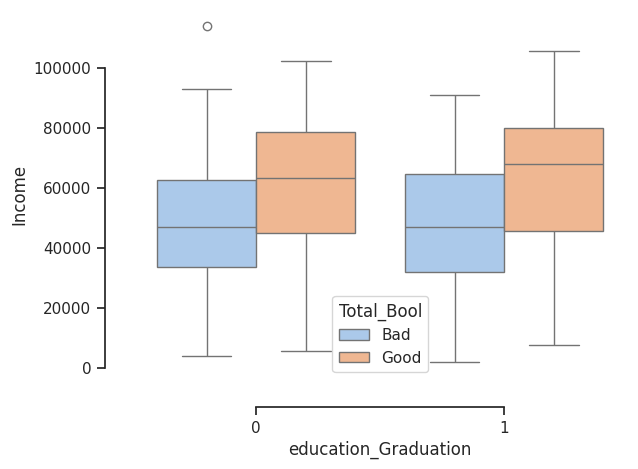

In [21]:
Evaluation_numerical = ['Total_Bool','Income', 'education_Graduation' ]

sns.set_theme(style="ticks", palette="pastel")

df_box_plt2 = df_eval[Evaluation_numerical]

# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=df_box_plt2, y = 'Income', x='education_Graduation', hue='Total_Bool')
sns.despine(offset=20, trim=True )

In [22]:
# k nearest neighbors method to find outliers
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df[['Income']])
Income_impute=pd.DataFrame(imputed_data,columns=['Income'])
df['Income']=Income_impute['Income'].reset_index(drop=True)
print('Sum of missing values:',df.isnull().sum().sum())

Sum of missing values: 0


In [23]:
#IQR method to identify outliers
Q1 = df_variables_numerical.quantile(0.25)
Q3 = df_variables_numerical.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = ((df_variables_numerical < (Q1 - threshold * IQR)) | (df_variables_numerical > (Q3 + threshold * IQR))).any(axis=1)

print("Outliers:")
print(df_variables_numerical[outliers])

sns.pairplot(df_variables_numerical)
plt.scatter(df_variables_numerical[outliers]['Income'], df_variables_numerical[outliers]['MntWines'], color='red', marker='x', label='Outliers')
plt.legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

PERFORMING **EDA** ON THE DATA

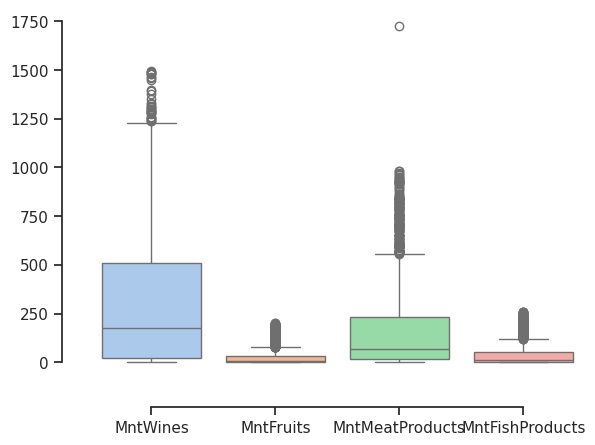

In [24]:
sns.set_theme(style="ticks", palette="pastel")

variables_spent_foot= ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts' ]
df_box_plt = df[variables_spent_foot]
# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=df_box_plt)
sns.despine(offset=20, trim=True )


In [25]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'marital_Status'],
      dtype='object')

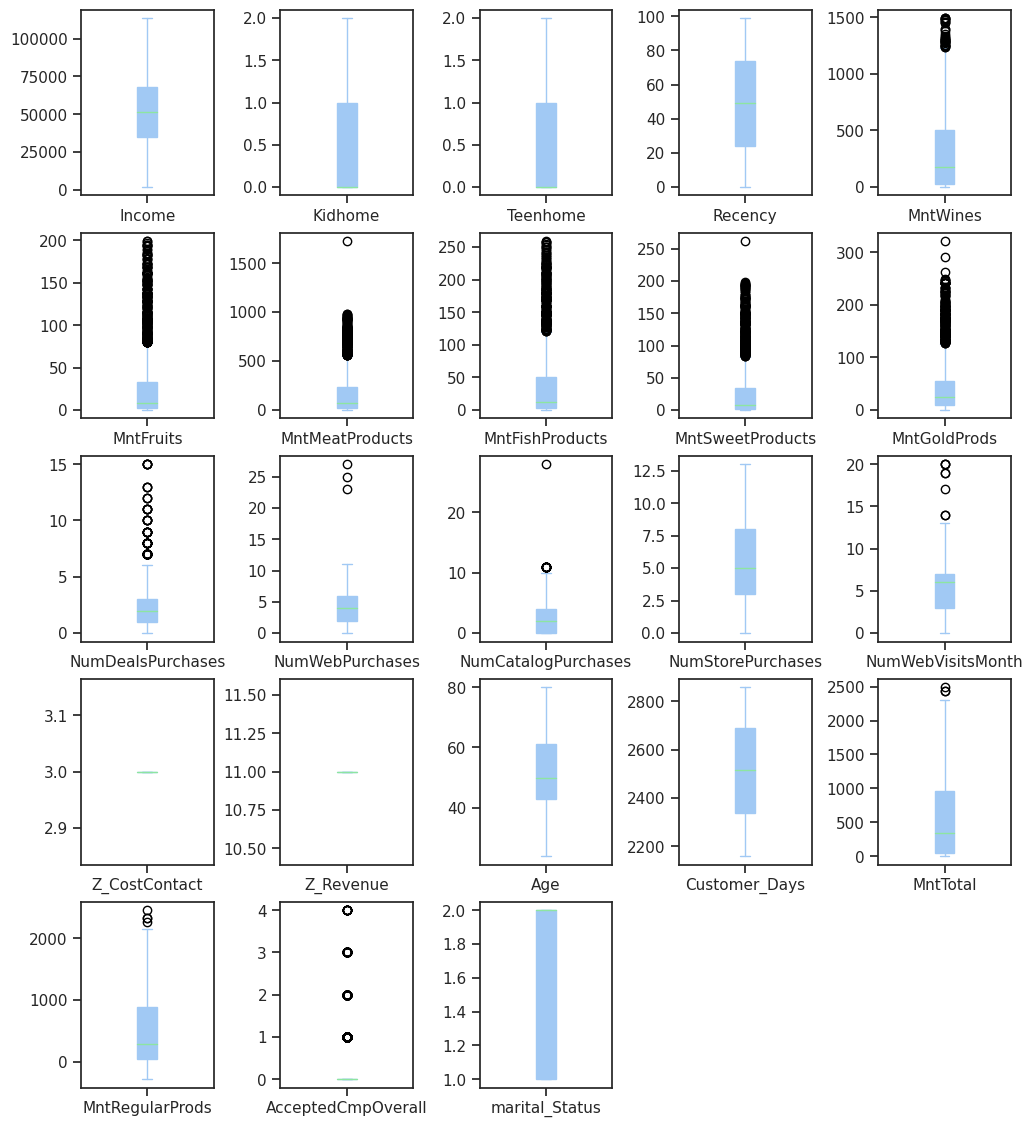

In [26]:
data_boxplot = df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'education_2n Cycle', 'education_Basic','education_Graduation', 'education_Master', 'education_PhD'])
data_boxplot.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);


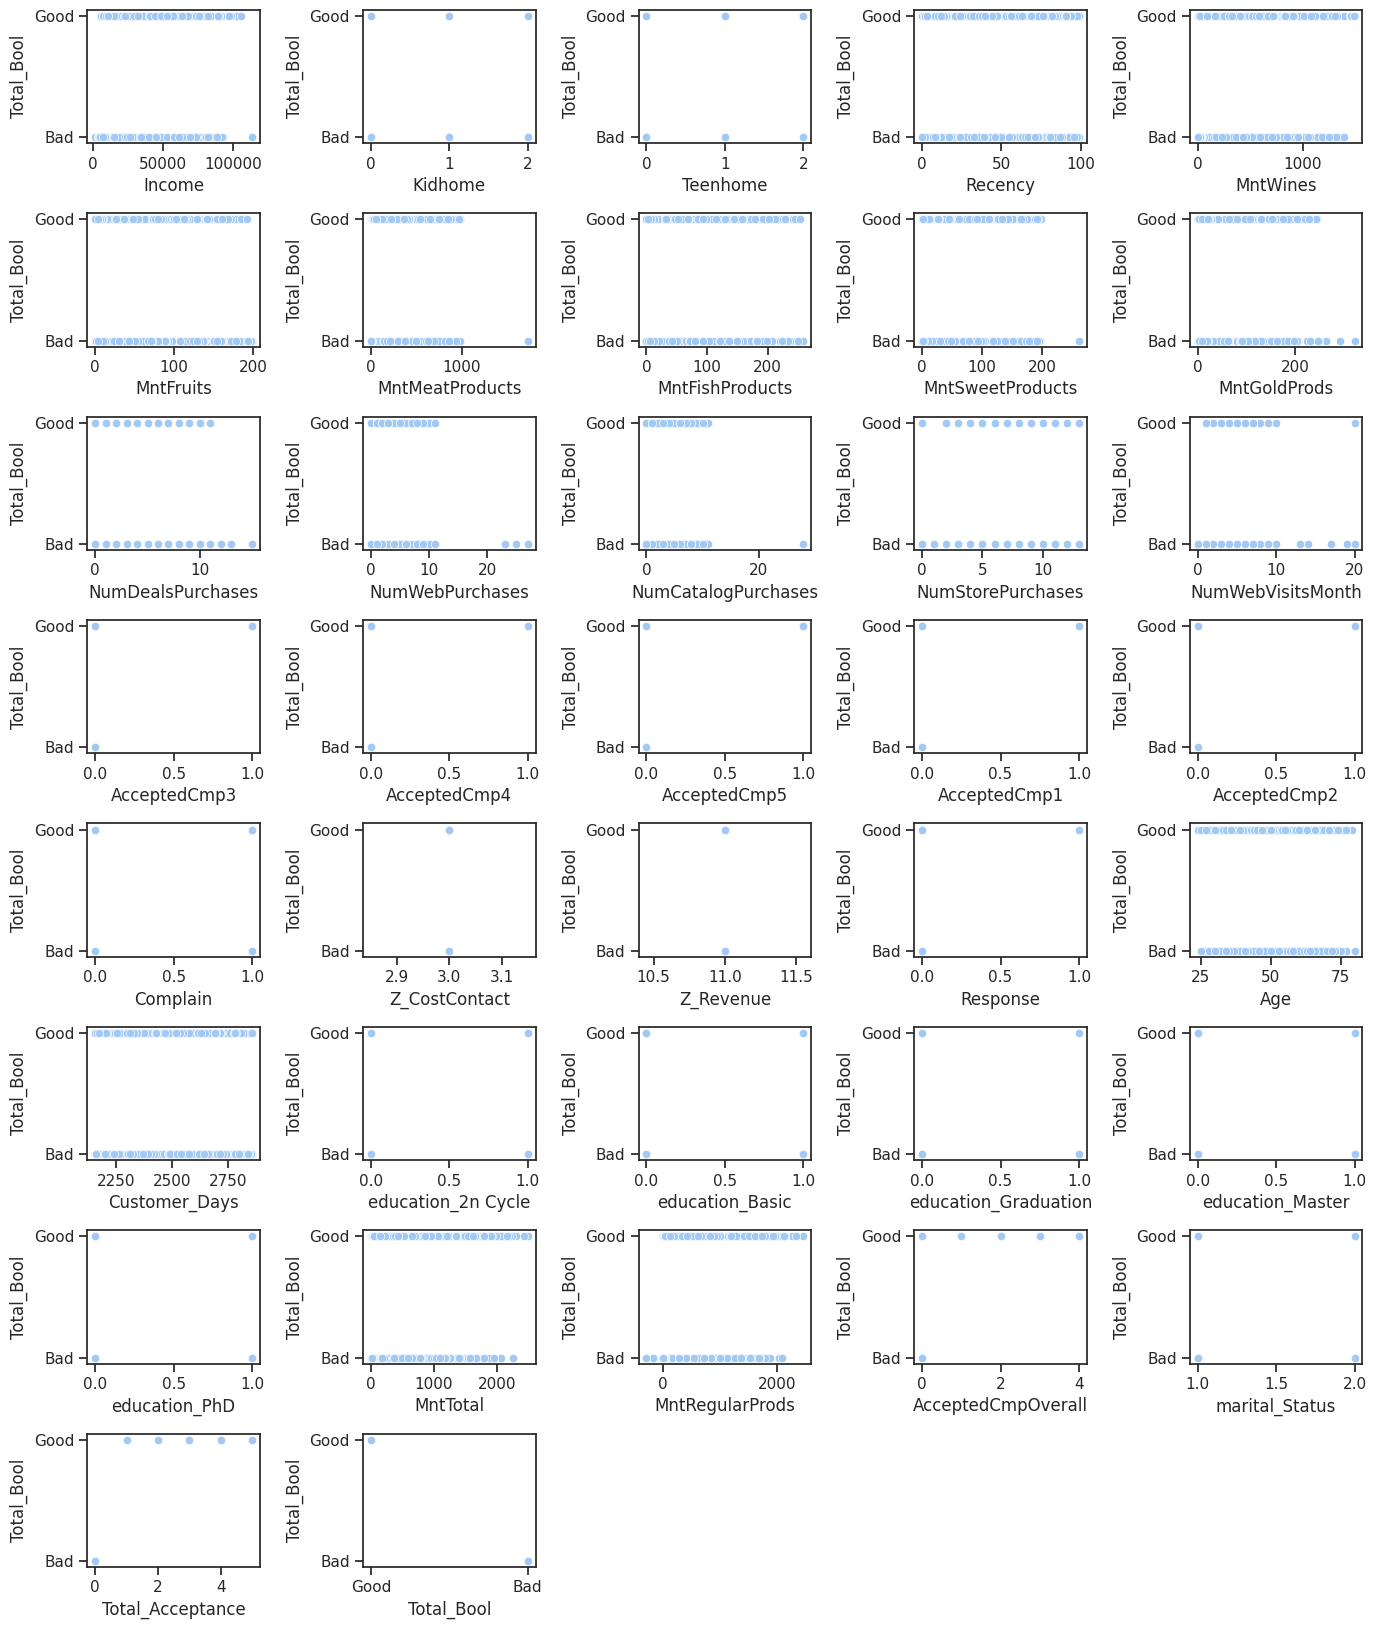

In [27]:
#implement a scatter plot for each variable to understand the behavior with the Total

fig = plt.figure(figsize=(14, 20))


Acceptance = df_eval.Total_Bool
for i in range(len(df_eval.columns)):
    fig.add_subplot(10,5,i+1)
    sns.scatterplot(x=df_eval.iloc[:,i], y=Acceptance)


plt.tight_layout()
plt.show()


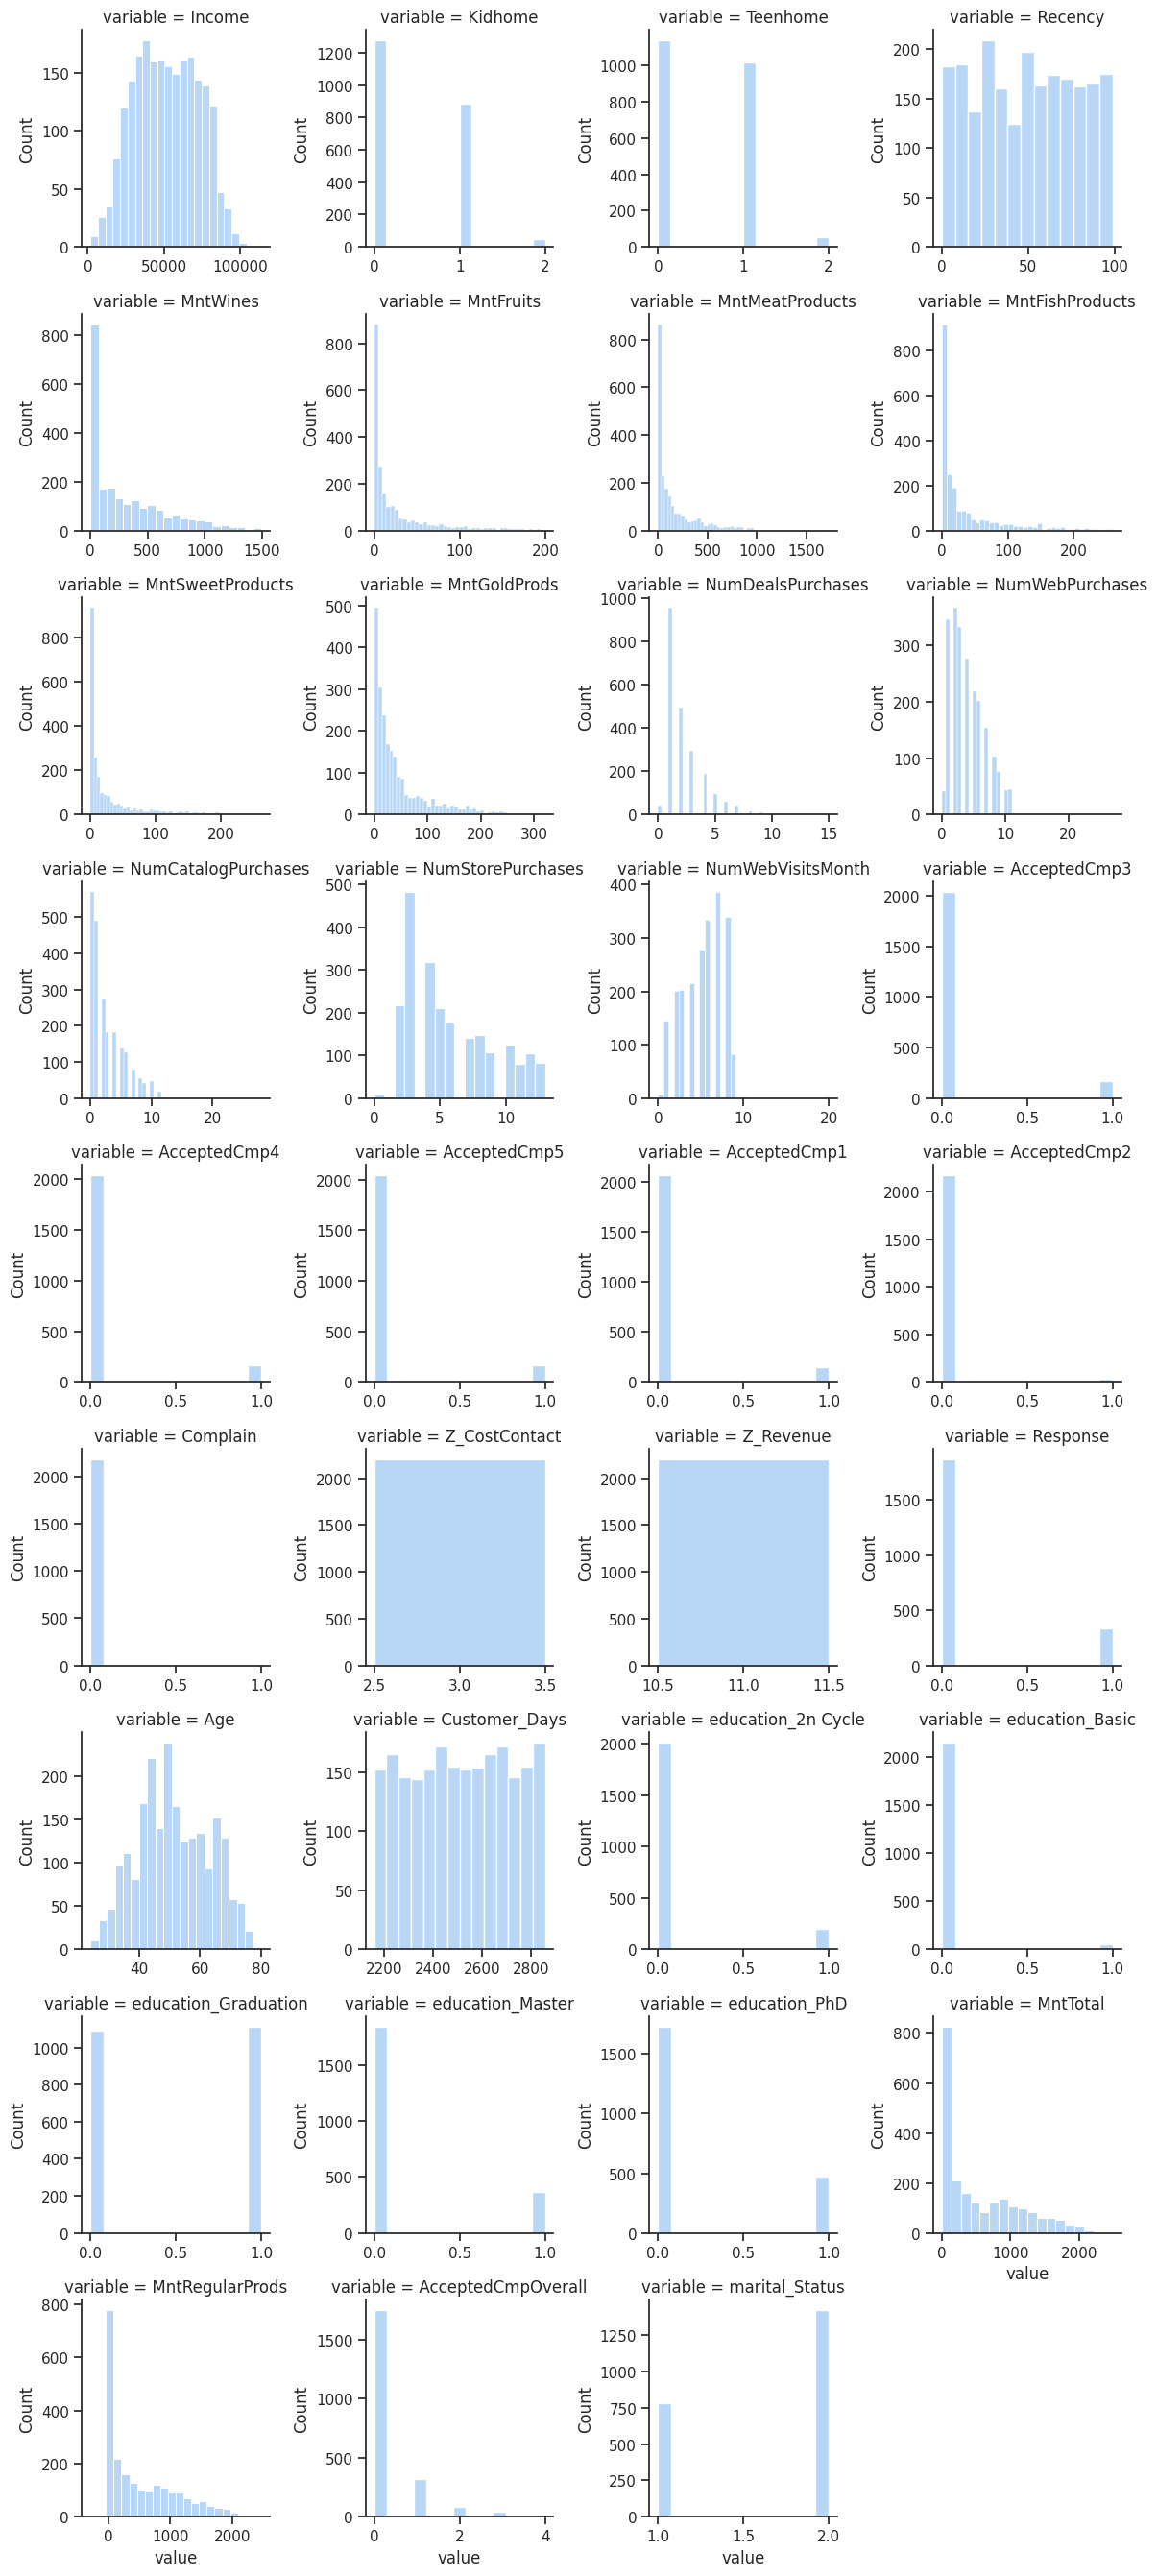

In [28]:
#Data distribution
hist = pd.melt(df, value_vars =df )
hist = sns.FacetGrid (hist, col='variable', col_wrap=4, sharex=False, sharey = False)
hist.map(sns.histplot, 'value')

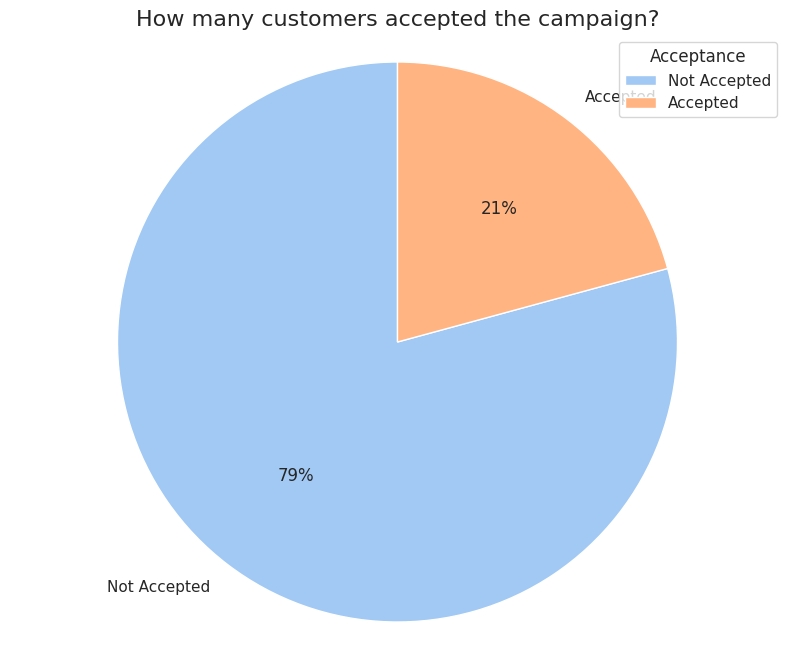

In [29]:
df['is_accepted'] = df['AcceptedCmpOverall'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')


fig, ax = plt.subplots(figsize=(10, 8))


counts = df['is_accepted'].value_counts()
labels = counts.index.tolist()

colors = sns.color_palette('pastel')

ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

ax.set_title('How many customers accepted the campaign?', fontsize=16)
ax.legend(title='Acceptance', loc='upper right')

ax.axis('equal')

plt.show()

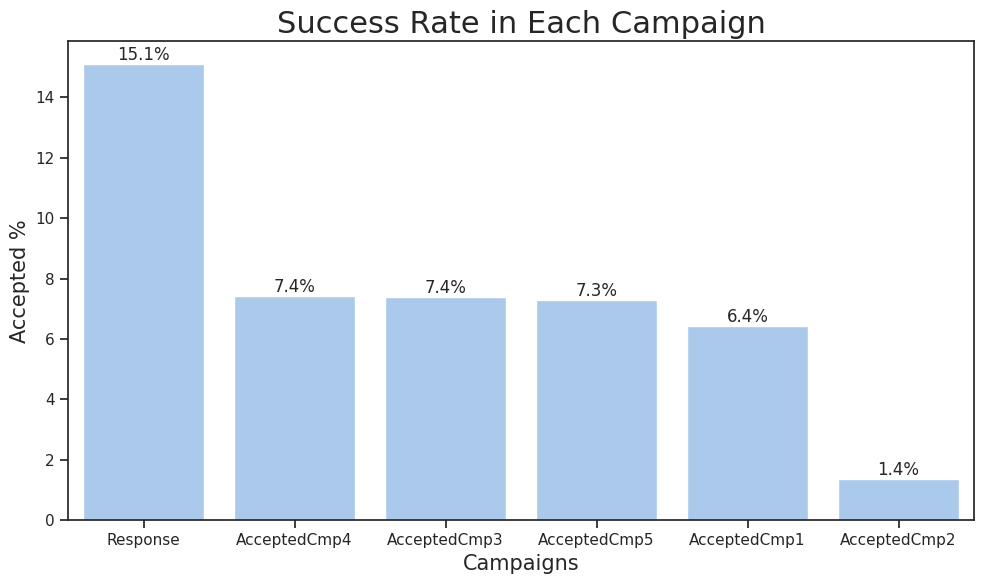

In [30]:
# Success Rate in Each Campaign
AcceptedCmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


campaigns = pd.DataFrame(df[AcceptedCmp].mean() * 100, columns=['Percent']).reset_index()


plt.figure(figsize=(10, 6))


ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False))

plt.xlabel('Campaigns', size=15)
plt.ylabel('Accepted %', size=15)
plt.title('Success Rate in Each Campaign', size=22)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:
data_corr =df.drop(['is_accepted','is_accepted','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],axis=1).corr()

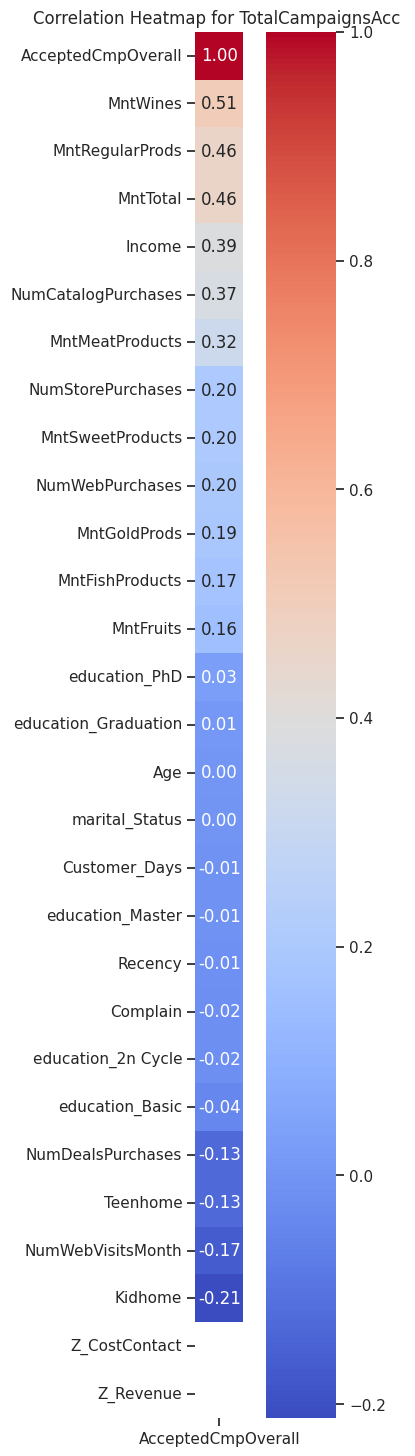

In [32]:
column_corr = data_corr.loc['AcceptedCmpOverall']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='coolwarm', cbar=True,square=True,fmt='.2f')
# Set the title
plt.title('Correlation Heatmap for TotalCampaignsAcc ')
# Display the heatmap
plt.show()

**Conclusion:**

The analysis of the customer data reveals several key insights into their purchasing behavior and preferences.

1. **Income Distribution:**
   - The distribution of customer income shows a significant variation, indicating the presence of both high-income and low-income customers.

2. **Spending Patterns:**
   - Customers exhibit diverse spending patterns across different product categories, with some showing a preference for wines, while others favor fruits, meat products, and fish products.

3. **Outlier Detection:**
   - The identification of outliers in the income and other numerical variables highlights the need for careful data preprocessing to ensure accurate analysis.

4. **Acceptance Rate:**
   - The overall acceptance rate for the marketing campaign was relatively low, indicating that most customers did not respond positively to the promotions.

5. **Campaign Success:**
   - Among the five campaigns, the first campaign (AcceptedCmp1) had the highest success rate, suggesting that customers were more receptive to the initial offer.

6. **Correlation Analysis:**
   - The correlation analysis revealed that certain customer attributes, such as education level and spending habits, have a moderate to strong influence on their acceptance of the marketing campaigns.

Overall, the analysis provides valuable insights into customer behavior and preferences, which can be leveraged to optimize marketing strategies and improve campaign effectiveness.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Teenhome             2205 non-null   int64  
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  NumWebVisitsMonth    2205 non-null   int64  
 15  AcceptedCmp3         2205 non-null   i

In [36]:

df['education'] = np.where((df['education_Graduation'] == 1) | (df['education_Master'] == 1) | (df['education_PhD'] == 1), 'high',
                           np.where((df['education_2n Cycle'] == 1), 'basic', 'low'))


In [38]:
df = df.drop(columns=['education_2n Cycle', 'education_Basic','education_Graduation', 'education_Master', 'education_PhD'])


In [41]:
to_drop = ['Z_CostContact', 'Z_Revenue']
df = df.drop(to_drop, axis=1)

In [46]:
import pandas as pd
from google.colab import files

# Export the preprocessed data to a CSV file
df.to_csv('preprocessed_data.csv', index=False)

# Download the CSV file
files.download('preprocessed_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>